In [24]:
import pandas as pd
import seaborn
import json
seaborn.set_theme()

import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.style.use("ggplot")
import matplotlib
matplotlib.rcParams["figure.figsize"] = [11, 11.0]
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["savefig.dpi"] = 150

In [25]:
with open('output_generation_results.json', encoding='utf-8-sig') as f_input:
    df = pd.json_normalize(json.load(f_input))


df = df.sort_values(by='model')

# Unique Models
unique_models = sorted(df['model'].unique())

llm_column = 'model'

# only metrci column names
metric_columns = [col for col in df.columns if col != llm_column and col != 'question' and col != 'answer' and col != 'output']
numeric_metric_columns = [col for col in metric_columns if col != 'finish_reason']

numeric_metric_columns_with_model = [col for col in df.columns if col != 'finish_reason' and col != 'question' and col != 'answer' and col != 'output']

metric_df = df[numeric_metric_columns_with_model]
melted_metrics_df = pd.melt(metric_df, llm_column, var_name='metric')

df

,model,output,answer,perplexity,finish_reason,question,latency_ms,timings.load_time.time,timings.sample_time.time,timings.sample_time.runs,...,timings.prompt_eval_time.tokens_per_second,timings.eval_time.time,timings.eval_time.runs,timings.eval_time.ms_per_token,timings.eval_time.tokens_per_second,timings.total_time.time,timings.total_time.tokens,token_usage.prompt_tokens,token_usage.completion_tokens,token_usage.total_tokens
73,Meta-Llama-3-8B-Instruct.Q8_0,(German)\nAnswer: Wer entweder den Antrag auf...,"Vom Vergabeverfahren ausgeschlossen wird, wer ...",1.124212,length,Wer wird vom Vergabeverfahren ausgeschlossen?,71944,690.22,361.29,361,...,230.44,5284.10,255,20.72,48.26,9469.66,9469,159,256,415
25,Meta-Llama-3-8B-Instruct.Q8_0,Antwort: Bis zum Vorlesungsbeginn des Semeste...,"Sprachnachweise für den gewählten Studiengang,...",1.285218,stop,Bis zu welchem Zeitpunkt können Sprachnachweis...,21851,698.16,58.90,58,...,245.01,752.38,36,20.90,47.85,3095.96,3095,171,36,207
101,Meta-Llama-3-8B-Instruct.Q8_0,\nAnswer: Die Zulassung erlischt und eine Imm...,(3)Wird die Frist zur Annahme des Studienplatz...,1.412359,stop,"Was ist, wenn man die Frist für die Studienpla...",19103,661.02,46.26,30,...,161.91,561.09,29,19.35,51.68,2342.58,2342,107,29,136
65,Meta-Llama-3-8B-Instruct.Q8_0,Antwort: Im Masterstudium können Sie sich an ...,Die Bewerberinnen und Bewerber nehmen am Auswa...,1.551443,stop,Wie kann man beim Masterstudium mitmachen?,55673,687.41,287.49,287,...,215.37,3825.33,187,20.46,48.88,7341.06,7341,148,187,335
29,Meta-Llama-3-8B-Instruct.Q8_0,Antwort: Bis zum Vorlesungsbeginn des Semeste...,"Sprachnachweise für den gewählten Studiengang,...",1.196938,stop,Wann kann man seine Deutschprüfung nachreichen...,53024,685.72,277.31,277,...,224.66,3561.35,173,20.59,48.58,7013.37,7013,154,173,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,mistral-7b-instruct-v0.2.Q4_K_M,\n\nAnswer: Die Anträge auf Zulassung für das ...,Die Anträge auf Zulassung für das Sommersemest...,1.054666,stop,Bis wann müssen die Anträge auf Zulassung für ...,13380,642.21,31.49,31,...,238.32,978.11,83,11.78,84.86,2102.76,2102,153,83,236
72,mistral-7b-instruct-v0.2.Q4_K_M,"\n\nAnswer: According to the provided context,...","Vom Vergabeverfahren ausgeschlossen wird, wer ...",1.180482,stop,Wer wird vom Vergabeverfahren ausgeschlossen?,14513,641.99,45.52,45,...,275.81,1399.62,117,11.96,83.59,2651.47,2651,177,117,294
32,mistral-7b-instruct-v0.2.Q4_K_M,\n\nAnswer: Ihre Nachreichung des Deutschtests...,"Sprachnachweise für den gewählten Studiengang,...",1.237140,stop,"Bis wann muss ich den Deutschtest nachreichen,...",23067,643.88,29.70,29,...,254.79,851.95,72,11.83,84.51,2005.07,2005,164,72,236
48,mistral-7b-instruct-v0.2.Q4_K_M,\n\nAnswer: Dem Antrag auf Zulassung müssen fo...,Dem Antrag auf Zulassung müssen folgende Unter...,1.029629,stop,Welche Unterlagen müssen dem Antrag auf Zulass...,21009,684.39,97.20,97,...,415.16,3081.79,241,12.79,78.20,4927.64,4927,284,241,525


<Axes: xlabel='perplexity'>

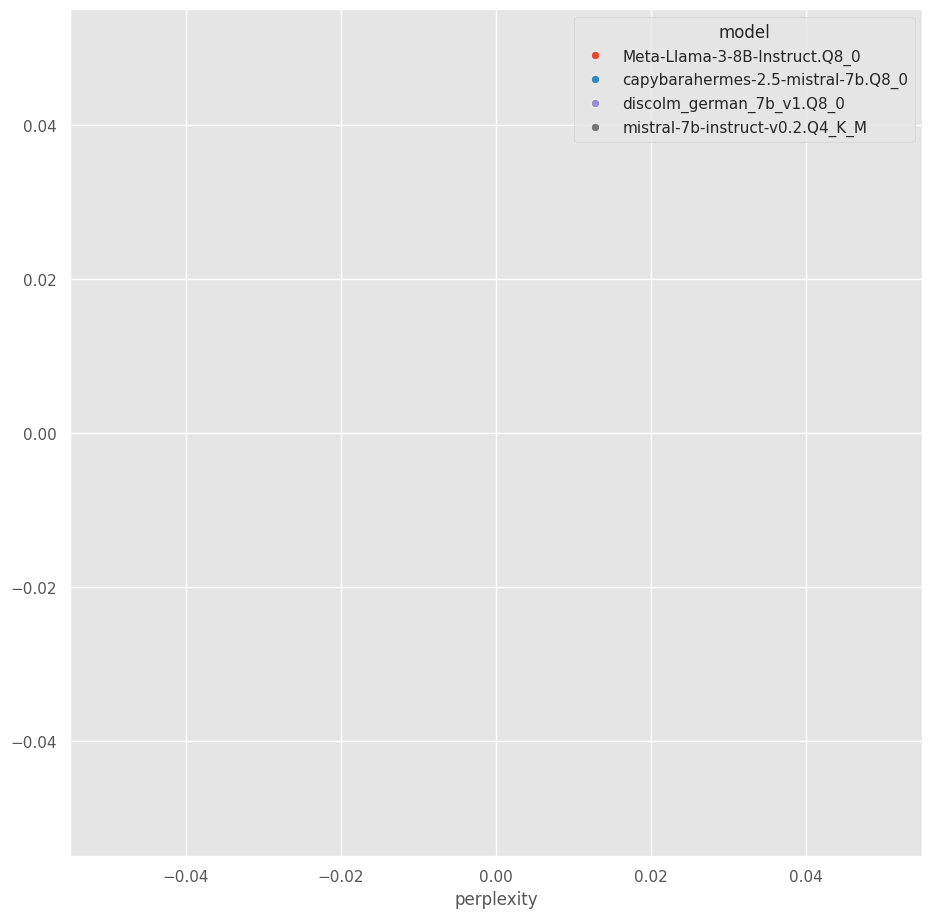

In [ ]:
seaborn.scatterplot(
 data=df, 
 x="perplexity",
 hue=llm_column
)

<Axes: xlabel='model', ylabel='perplexity'>

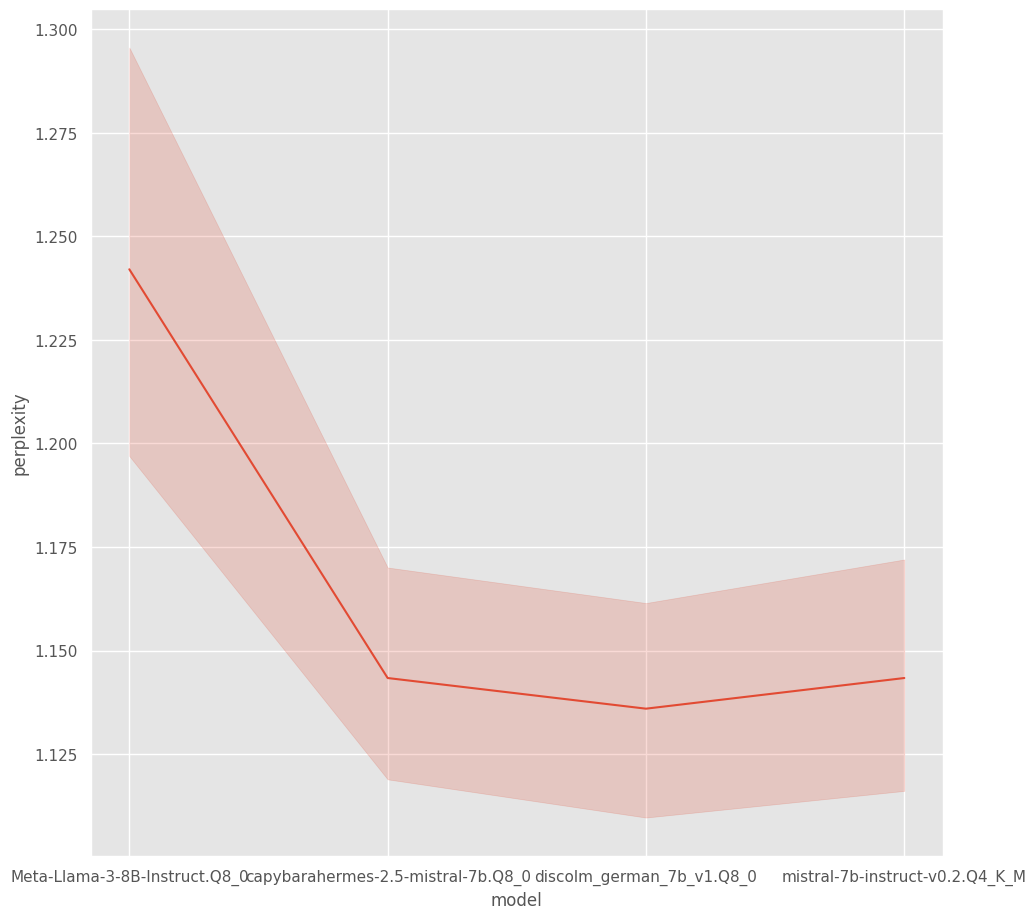

In [27]:
seaborn.lineplot(
 data=df, 
 x=llm_column,
 y="perplexity",
)

# **Histograms**

## One Histogram Plot for each Metric


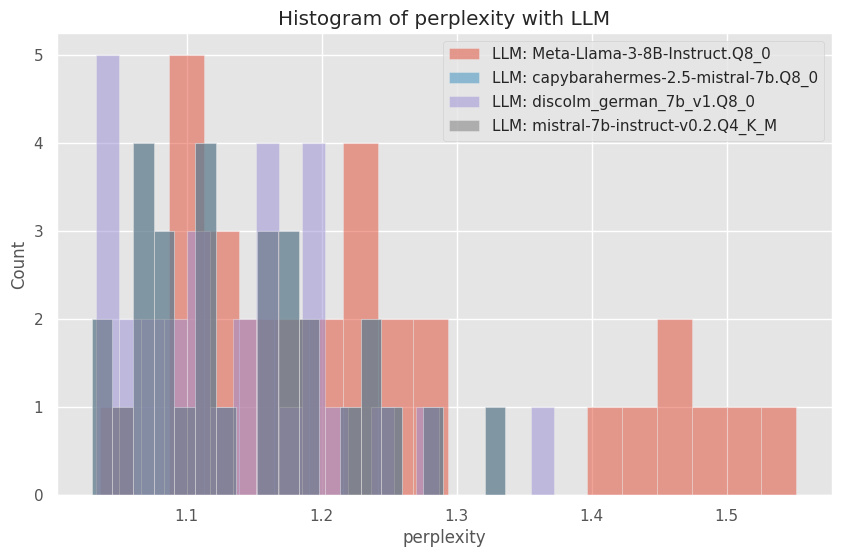

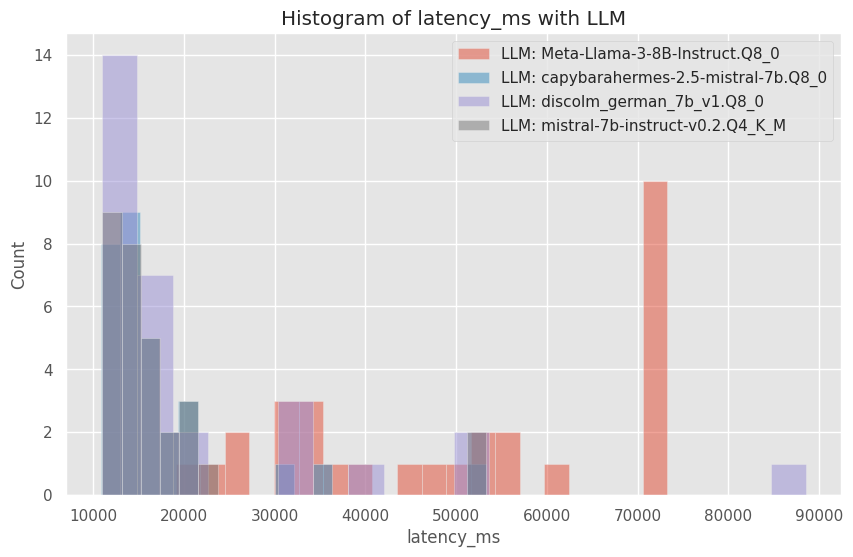

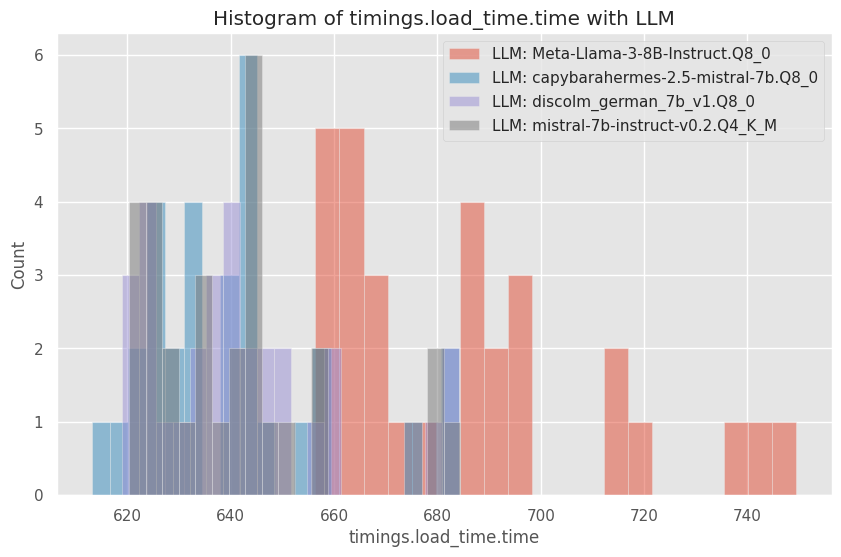

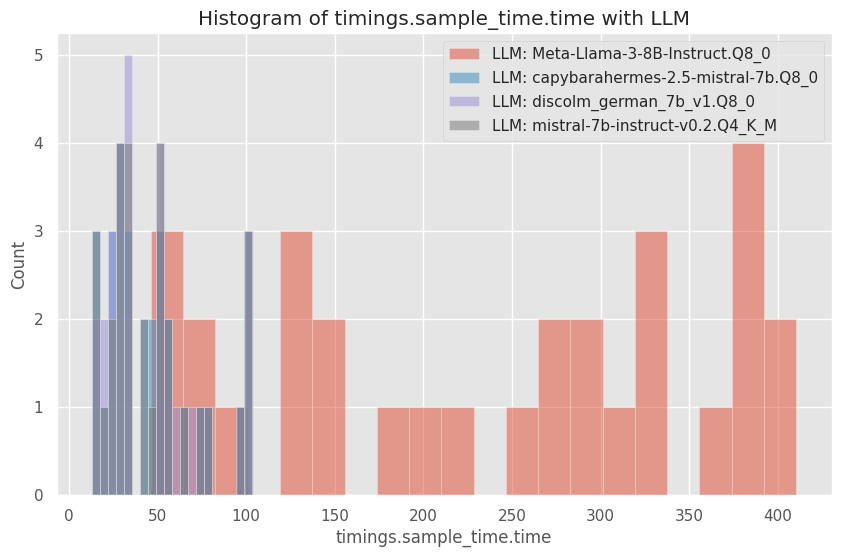

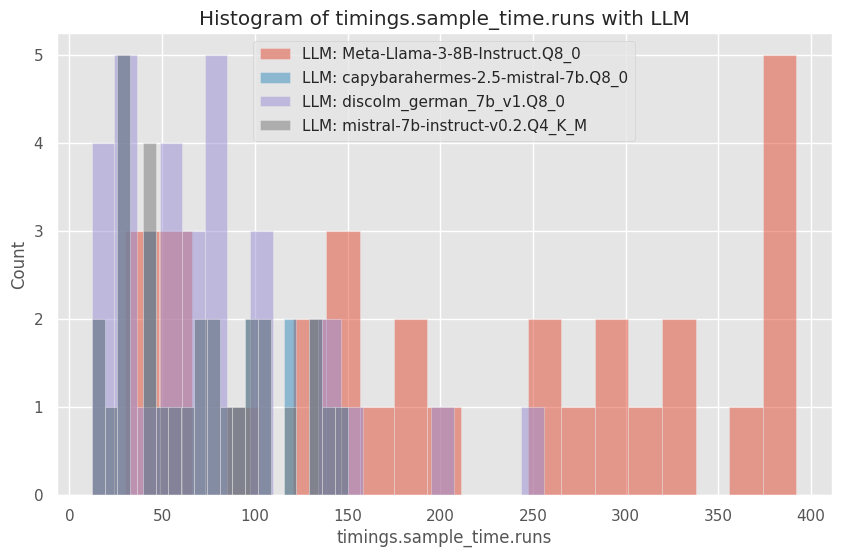

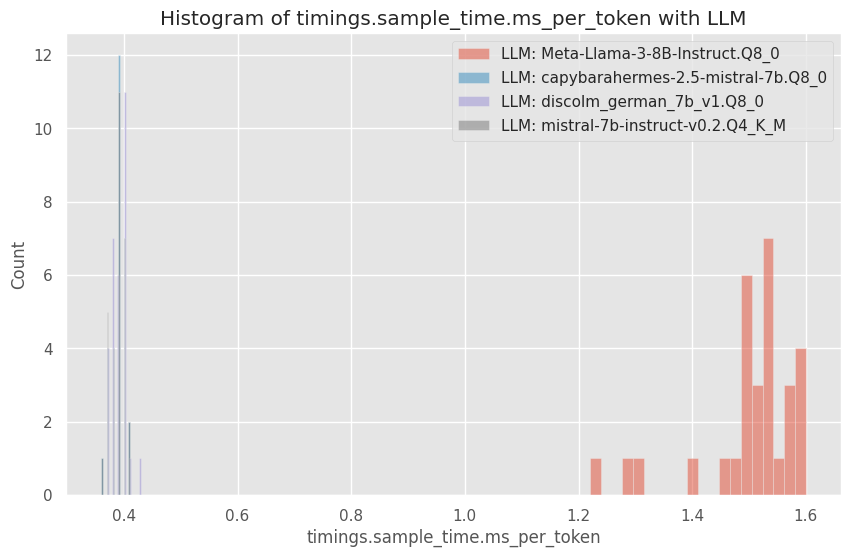

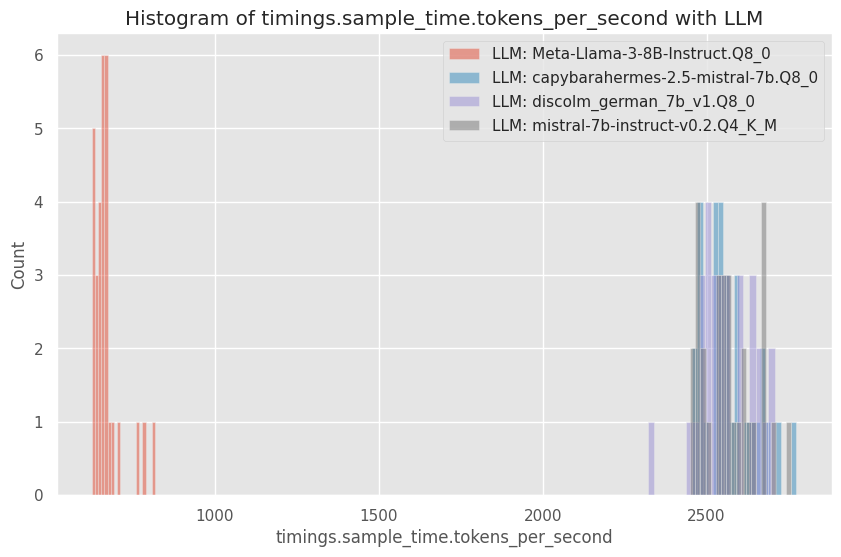

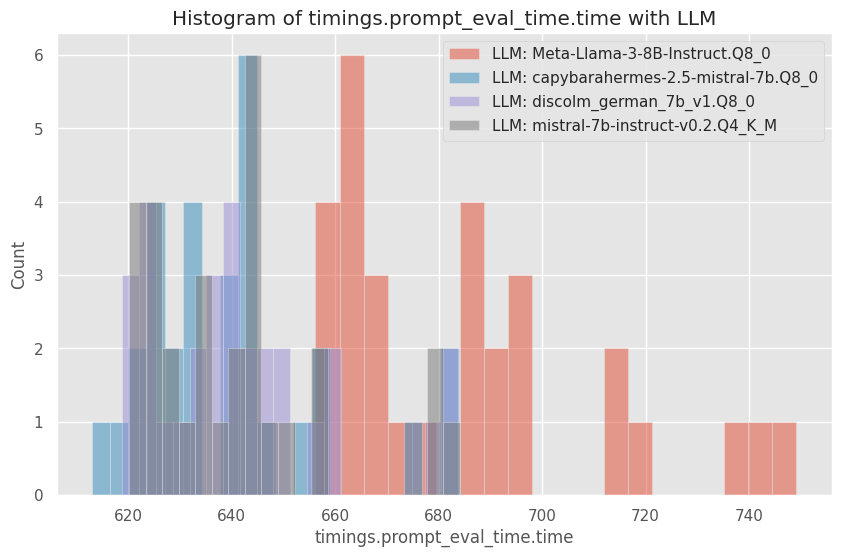

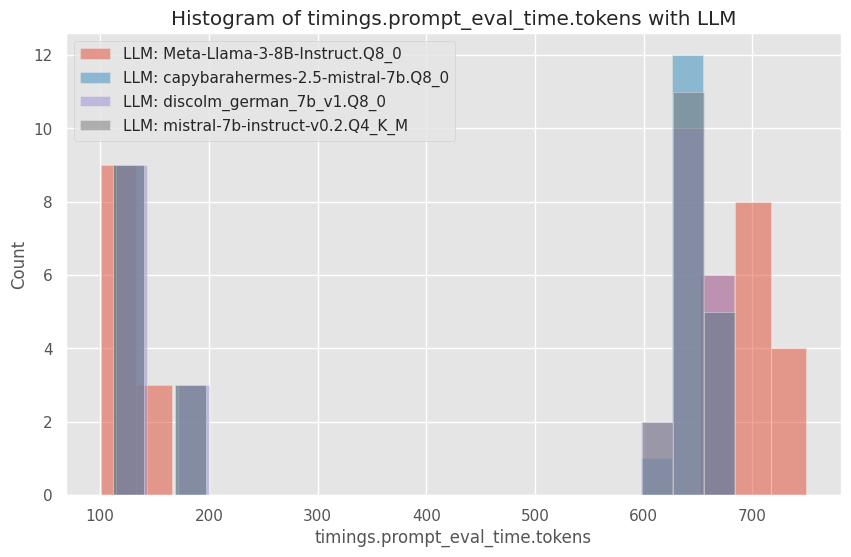

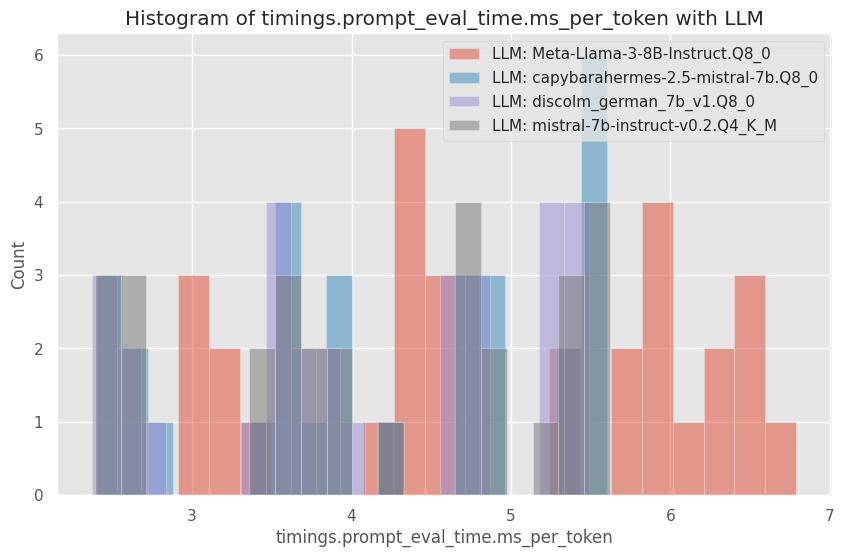

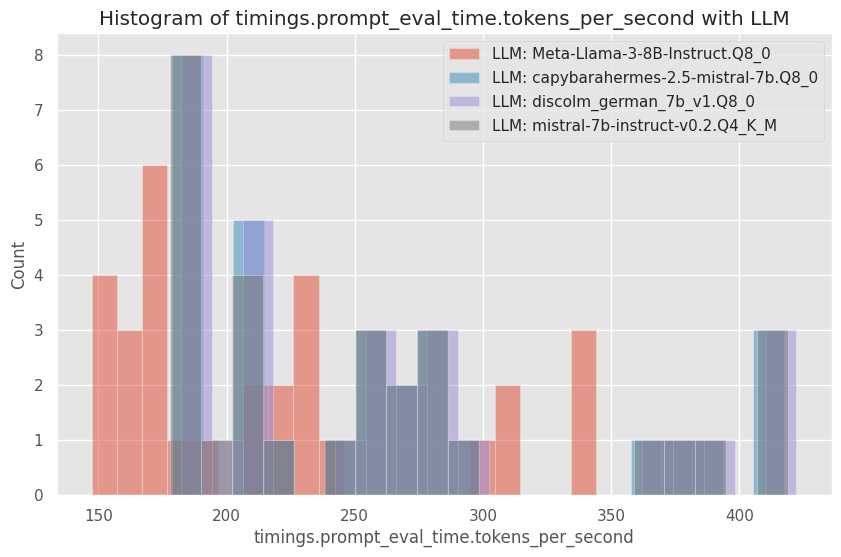

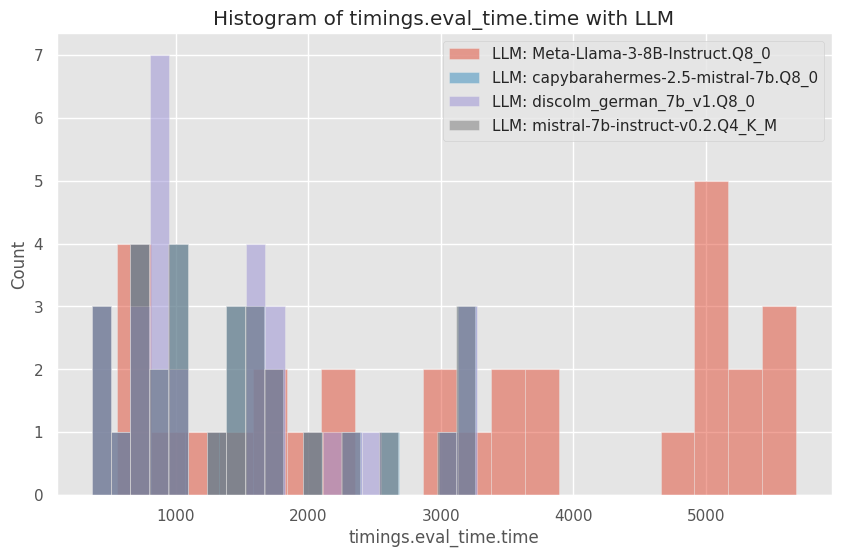

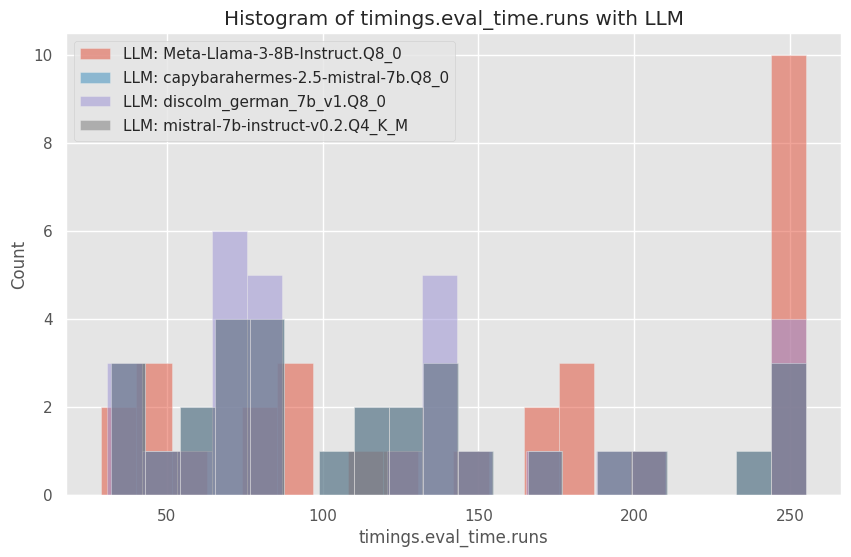

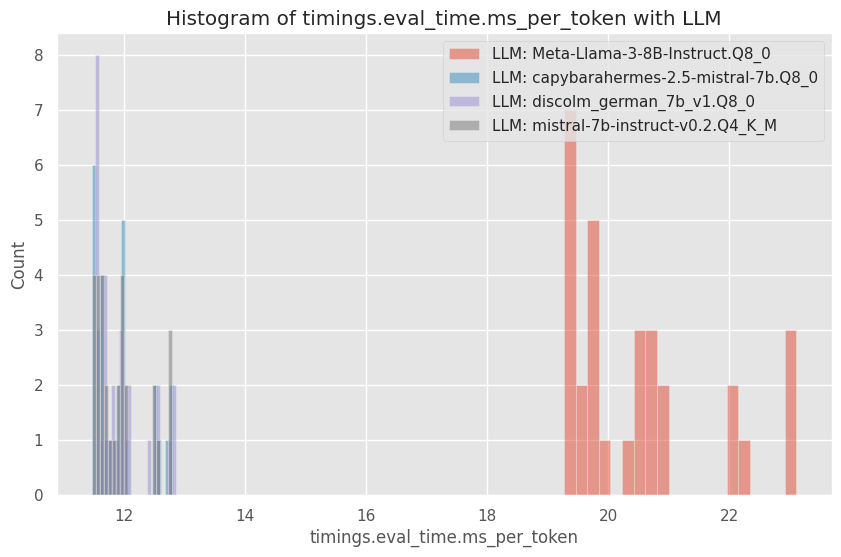

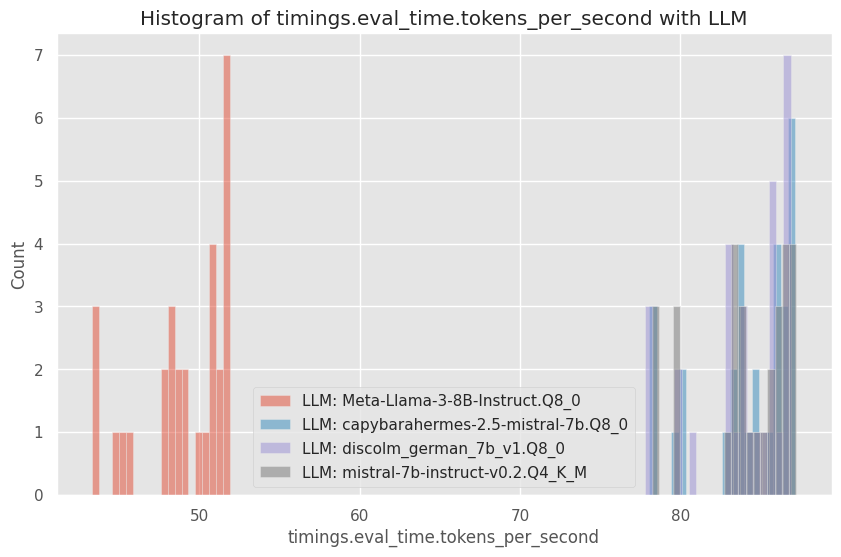

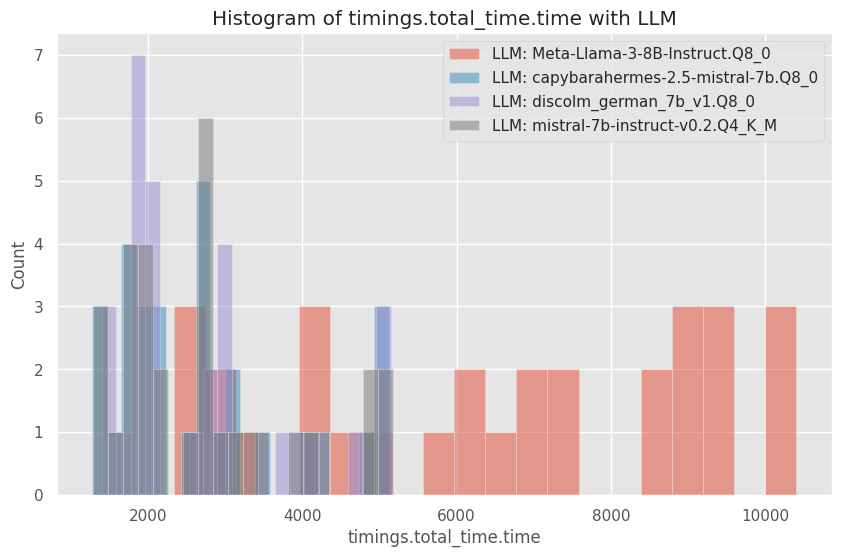

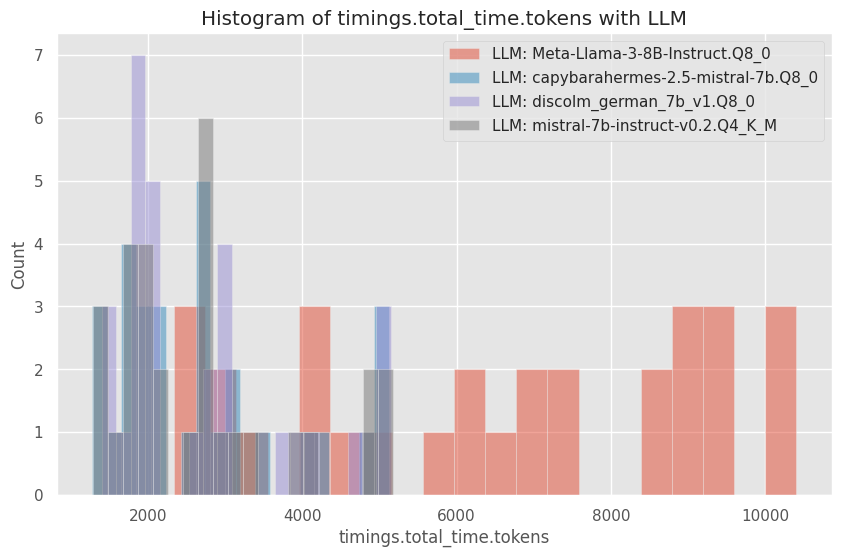

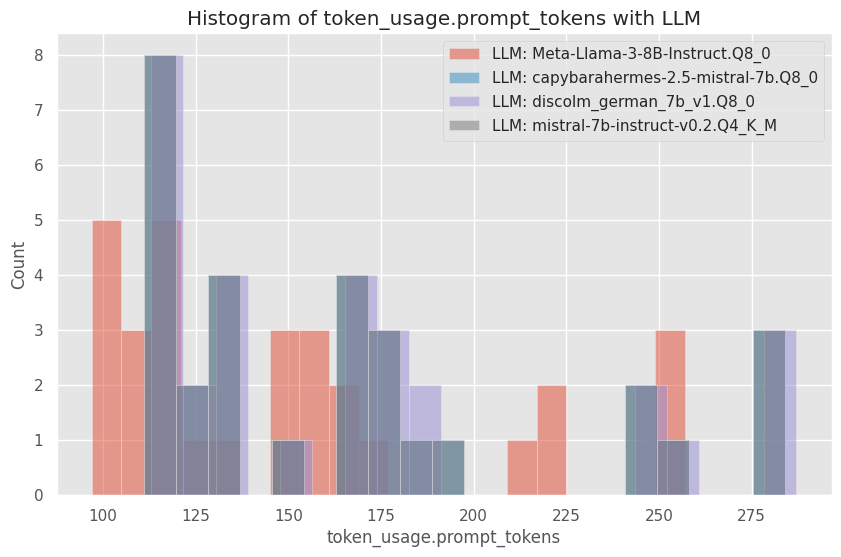

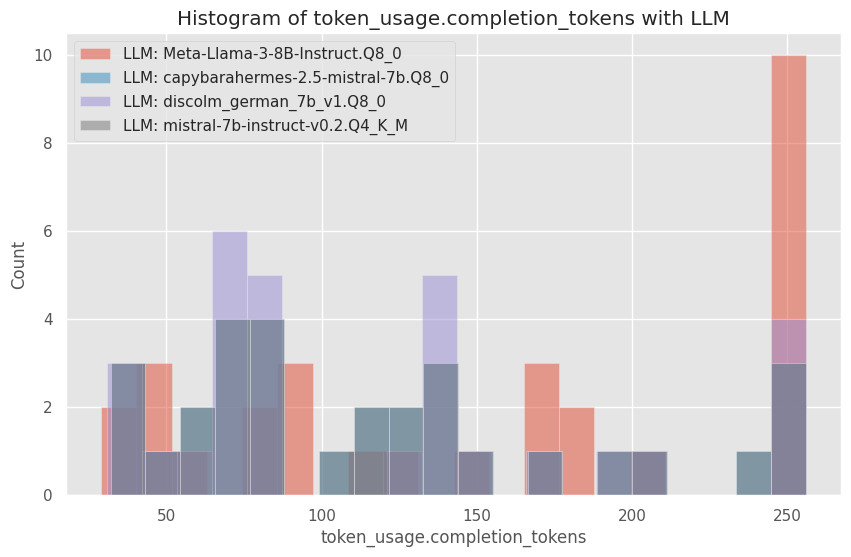

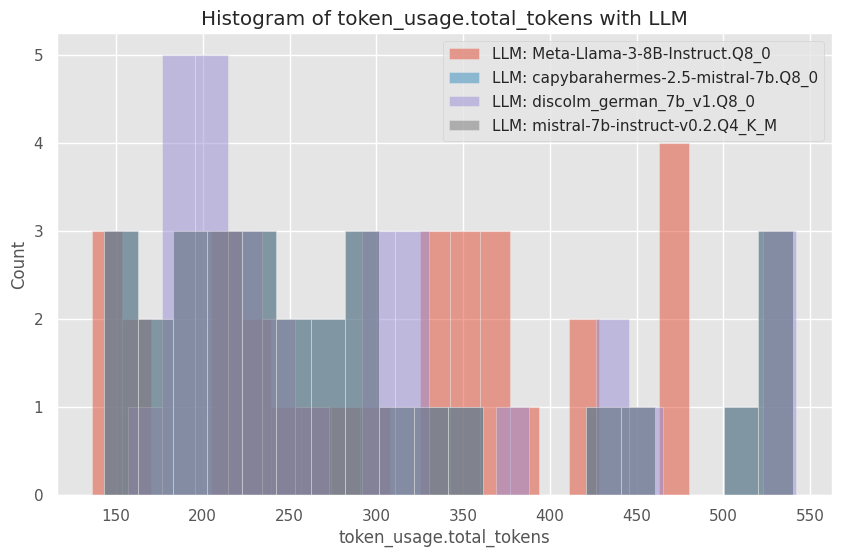

In [28]:


# Iterate over each metric column
for metric_col in numeric_metric_columns:
    # Create a figure and axis object for each metric column
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Get the range for the metric column
    min_val = df[metric_col].min()
    max_val = df[metric_col].max()
    
    # Iterate over unique 'llm' values and plot histogram for each value
    for llm_val in df[llm_column].unique():
        # Filter DataFrame for the specific 'llm' value
        subset_df = df[df[llm_column] == llm_val]
        
        # Plot histogram for the subset DataFrame
        subset_df[metric_col].plot(kind='hist', bins=20, alpha=0.5, label=f'LLM: {llm_val}', ax=ax)
    
    # Set labels and title
    plt.xlabel(metric_col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {metric_col} with LLM')
    plt.legend()
    
    # Show the plot for the current metric column
    plt.show()

<Axes: xlabel='perplexity', ylabel='Count'>

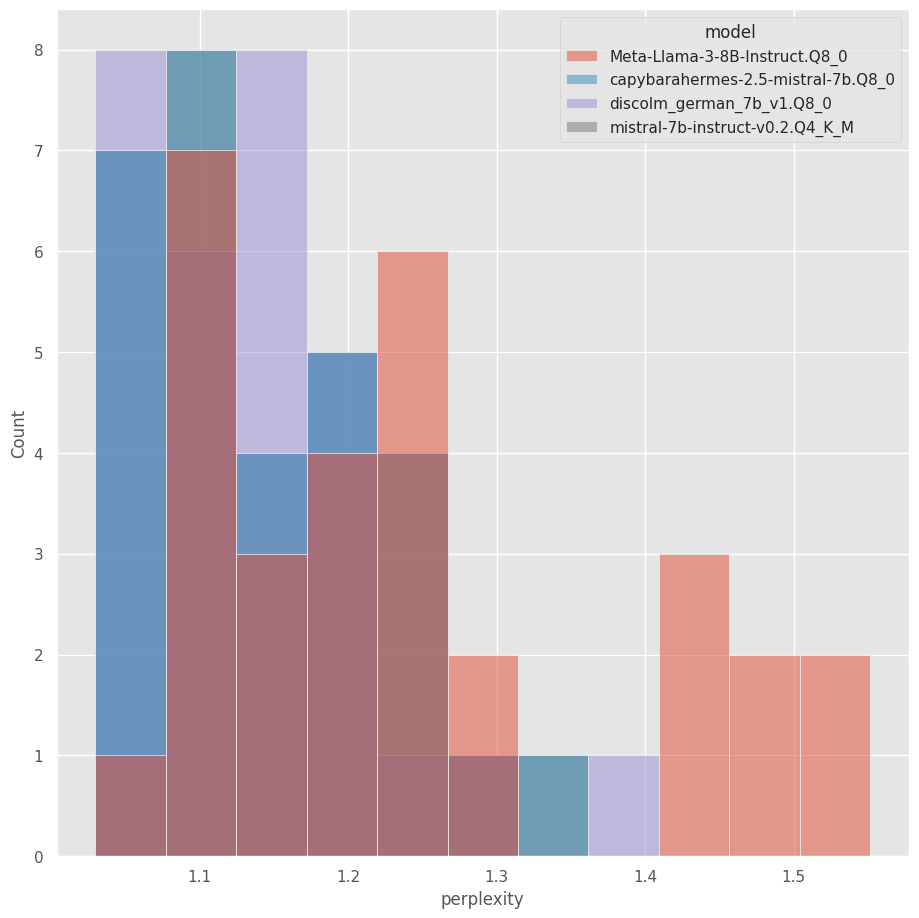

In [29]:
#seaborn.histplot(df, hue='llm')

seaborn.histplot(df, x='perplexity',  hue=llm_column)

## Small Histograms in ONE Plot

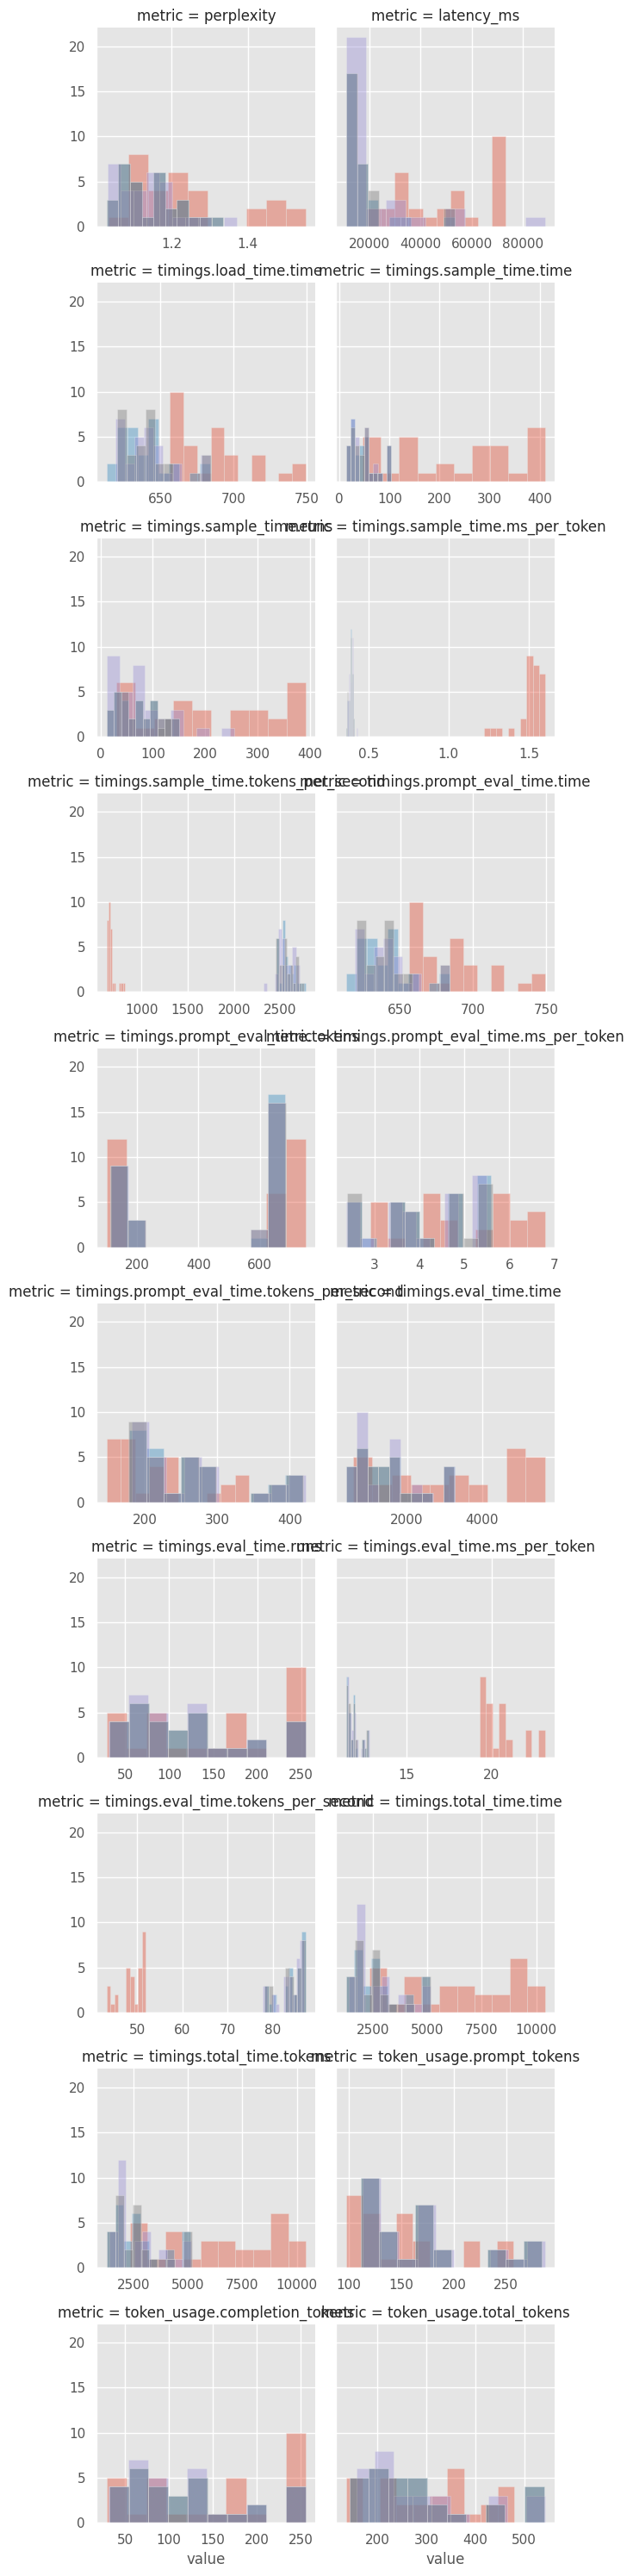

In [30]:
grid = seaborn.FacetGrid(melted_metrics_df, hue=llm_column, col="metric", col_wrap=2, sharex=False)
grid.map(plt.hist, "value", alpha=.4)

## Large Histograms in ONE Plot

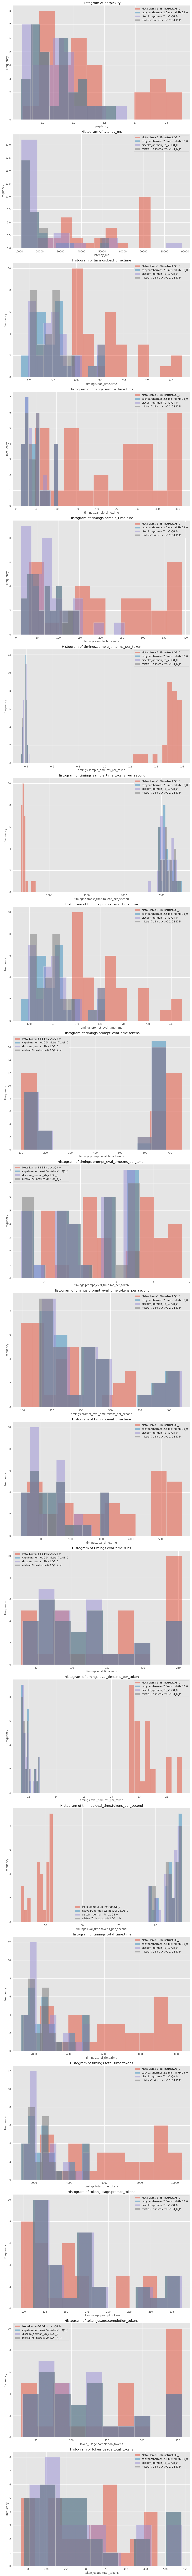

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from CSV

# Get unique values of 'llm' column
llm_values = df[llm_column].unique()


num_metrics = len(numeric_metric_columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(12, 8*num_metrics))

# Plot histograms for each metric
for i, metric in enumerate(numeric_metric_columns):
    ax = axes[i]
    for llm in llm_values:
        data = df[df[llm_column] == llm][metric]
        ax.hist(data, alpha=0.5, label=llm)
    ax.set_title(f'Histogram of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()